In [1]:
import numpy as np
import csv
import graph_tool as gt
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import graph_tool.stats as gts

In [2]:
#open edgelist from txt and plot it in graph_tool

def string_to_list(string):
    """given a string of two elements, returns each element in a list"""
    return [int(string.split(' ')[0]), int(string.split(' ')[1])]

n = 136 #n cities

#get dataset of graphs
G_list = np.array([gt.Graph(directed = False) for i in range(n)], dtype = object)
o_f = '/Users/endingalaporte/Desktop/cities_stats/input'
for i in range(n):
    open_path = o_f + "/edgelist_city"+str(i)+".txt"
    text = open(open_path, 'r')
    reader = csv.reader(text, delimiter='\n')
    elist = [string_to_list(row[0]) for row in reader]
    G_list[i].add_edge_list(elist)
    
#read as many labels as their are graphs
label_path = '/Users/endingalaporte/Desktop/cities_stats/input/country_binary.txt'
text = open(label_path, encoding = 'utf-16')
reader = csv.reader(text, delimiter='\n')
labels = np.array([int(row[0]) for row in reader])
labels = labels[0:len(G_list)]

#city names
input_path = "/Users/endingalaporte/Desktop/cities_stats/input"
with open(input_path + '/communes.txt'
          , 'r') as f:
    names = [line.strip() for line in f]

In [3]:
#compute stats for each graph
n = len(G_list)

def stats(G : gt.Graph):
    """given graph G, returns max, min and average degree, number of vertices and edges, graph density in an array"""
    v_deg = []
    for v in G.vertices():
        v_deg.append(v.out_degree() + v.in_degree())
    v_deg = np.array(v_deg)
    n_v = len(tuple(G.vertices()))
    n_e = len(tuple(G.edges()))
    d = 2*n_e/(n_v*(n_v-1))
    return np.array([v_deg.max(), v_deg.min(), v_deg.mean(), n_v, n_e, d])

G_stats = []
for g in G_list:
    G_stats.append(stats(g))
G_stats = np.array(G_stats)
G_stats.shape

(136, 6)

/Users/endingalaporte/Documents/python/miniconda3/envs/jupyternotebookenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


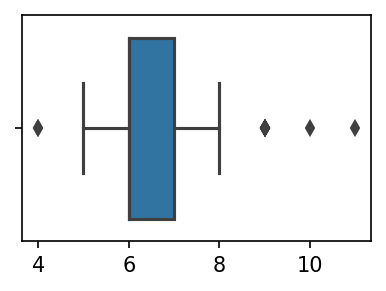

In [4]:
#max degrees
output = "/Users/endingalaporte/Desktop/cities_stats/output"
plt.figure(figsize = (3,2), dpi = 150)
sns.boxplot(G_stats[:,0])
plt.savefig(output + "/boxplot_maxdeg.svg")

/Users/endingalaporte/Documents/python/miniconda3/envs/jupyternotebookenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


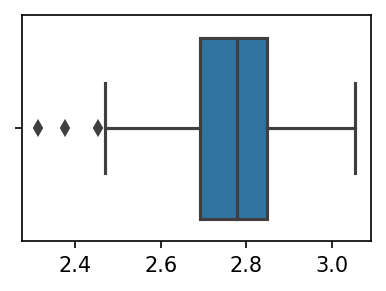

In [5]:
#average degree
plt.figure(figsize = (3,2), dpi = 150)
sns.boxplot(G_stats[:,2])
plt.savefig(output + "/boxplot_avgdeg.svg")

/Users/endingalaporte/Documents/python/miniconda3/envs/jupyternotebookenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


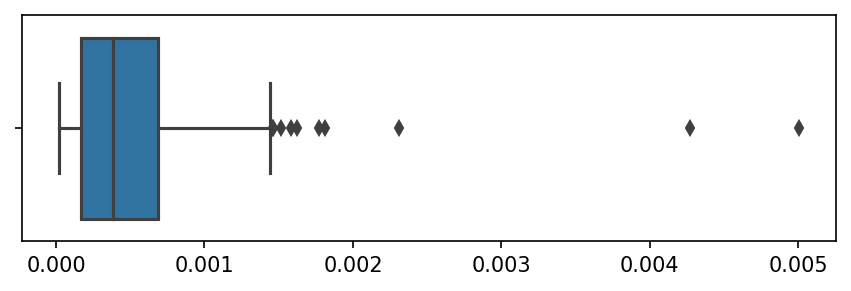

In [6]:
#graph density
plt.figure(figsize = (7,2), dpi = 150)
sns.boxplot(G_stats[:,5])
plt.savefig(output + "/boxplot_graphdensity.svg")

In [7]:
#find which city id has highest max degree
    
index = np.where(G_stats[:,0] == G_stats[:,0].max())[0][0]
print(names[index])

#average of the mean degree of each graph
G_stats[:,2].mean()

#cities with lowest highest degree are chinese cities, we can imagine they are grid like
np.where(G_stats[:,0] == 4)

Paris


(array([110, 131]),)